# Predicting car prices using k-nearest neighbors algorithm
## Introduction
The objective of this project is to predict car prices from their technical specifications. The data used can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile). The algorithm used for this project will be the k-nearest neighbors.
Steps:
1. Data is read, missing values are dealt with, categorical variables are encoded and numerical values are normalized.
2. Univariate k-nearest neighbor models are tested for different k values
3. The best features used in these univariate models are identified and used together in multivariate models
4. Hyper parameters are optimized to further improve the model

## Data Cleaning
### Reading the data

In [54]:
import pandas as pd
col_names = ['symboling',
             'normalized_losses',
             'make',
             'fuel_type',
             'aspiration',
             'num_doors',
             'body_style',
             'drive_wheels',
             'engine_location',
             'wheel_base',
             'length',
             'width',
             'height',
             'curb_weight',
             'engine_type',
             'num_cylinders',
             'engine_size',
             'fuel_system',
             'bore',
             'stroke',
             'compression_ratio',
             'horsepower',
             'peak_rpm',
             'city_mpg',
             'highway_mpg',
             'price']
cars = pd.read_csv('imports-85.data', sep=',', header=None, names=col_names)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The target column is price. Features that seem relevant at first glance are length, width, height, curb weight, engine size, bore, stroke, compression ratio, horsepower, peak rpm, city and highay mileage. The number of doors can be converted to a numeric column as well so they can be used in the models. 

### Exploring the data

In [55]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

No missing values? More on that later. First, some columns can be removed since they are entirely non numeric and cannot be converted. Let's only keep the relevant ones.
### Removing unusable columns
* drive wheels, engine location, engine type, make, fuel system, aspiration, body style, fuel type are non numerical
* symboling is not relevant to the price

In [56]:
to_drop = ['drive_wheels',
 'engine_location',
 'engine_type',
 'make',
 'fuel_system',
 'aspiration',
 'body_style',
 'fuel_type',
 'symboling']
cars = cars.drop(to_drop, axis=1)

### Converting data to numerical type
The number of doors and number of cylinders can be converted to numeric.

In [57]:
print(cars['num_doors'].value_counts(dropna=False))
print(cars['num_cylinders'].value_counts(dropna=False))

four    114
two      89
?         2
Name: num_doors, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64


In [58]:
def convert_number(string):
    if string == 'two':
        return 2
    elif string == 'three':
        return 3
    elif string == 'four':
        return 4
    elif string == 'five':
        return 5
    elif string == 'six':
        return 6
    elif string == 'eight':
        return 8
    elif string == 'twelve':
        return 12      
# applying the function above to both columns
cars['num_doors'] = cars['num_doors'].apply(convert_number)
cars['num_cylinders'] = cars['num_cylinders'].apply(convert_number)
print(cars['num_doors'].value_counts(dropna=False))
print(cars['num_cylinders'].value_counts(dropna=False))

4.0    114
2.0     89
NaN      2
Name: num_doors, dtype: int64
4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num_cylinders, dtype: int64


### Dealing with missing values
Most of the missing values are actually written as "?" in the data

In [59]:
import numpy as np
cars = cars.replace('?', np.nan)
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
normalized_losses    164 non-null object
num_doors            203 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
num_cylinders        205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(6), int64(5), object(6)
memory usage: 27.3+ KB
None


The number of missing values in the normalized losses column is too high to drop the corresponding rows.

We dont want to alter the price column because it is our objective.

Let's drop rows with missing price values.

In [60]:
cars = cars.dropna(subset=['price'])
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 17 columns):
normalized_losses    164 non-null object
num_doors            199 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
num_cylinders        201 non-null int64
engine_size          201 non-null int64
bore                 197 non-null object
stroke               197 non-null object
compression_ratio    201 non-null float64
horsepower           199 non-null object
peak_rpm             199 non-null object
city_mpg             201 non-null int64
highway_mpg          201 non-null int64
price                201 non-null object
dtypes: float64(6), int64(5), object(6)
memory usage: 28.3+ KB
None


Now that there are no longer placeholder '?', all the data left is numerical, and we can fill the missing values with the column means.

In [61]:
cars = cars.astype('float')
cars = cars.fillna(cars.mean())
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 17 columns):
normalized_losses    201 non-null float64
num_doors            201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
num_cylinders        201 non-null float64
engine_size          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(17)
memory usage: 28.3 KB
None


### Normalizing the data
With the data fixed, it can now be normalized such that all values count equally in a nearest neighbor model.

In [62]:
cars_normalized = (cars - cars.min())/(cars.max() - cars.min())
cars_normalized['price'] = cars['price']
print(cars_normalized.head())

   normalized_losses  num_doors  wheel_base    length     width    height  \
0           0.298429        0.0    0.058309  0.413433  0.324786  0.083333   
1           0.298429        0.0    0.058309  0.413433  0.324786  0.083333   
2           0.298429        0.0    0.230321  0.449254  0.444444  0.383333   
3           0.518325        1.0    0.384840  0.529851  0.504274  0.541667   
4           0.518325        1.0    0.373178  0.529851  0.521368  0.541667   

   curb_weight  num_cylinders  engine_size      bore    stroke  \
0     0.411171            0.2     0.260377  0.664286  0.290476   
1     0.411171            0.2     0.260377  0.664286  0.290476   
2     0.517843            0.4     0.343396  0.100000  0.666667   
3     0.329325            0.2     0.181132  0.464286  0.633333   
4     0.518231            0.3     0.283019  0.464286  0.633333   

   compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg    price  
0             0.1250    0.294393  0.346939  0.222222     0.2894

## Univariate 5 nearest neighbors model
Let's start modeling with the simplest form of the nearest neighbors algorithm: univariate, with a fixed number of neighbors. Let's compute a model using each feature, and compare their root mean squared errors to find the highest performing features.

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(training_col, target_col, df):
    # randomize the data
    rand_df = df.reindex(np.random.permutation(df.index))
    # divide into test and train
    threshold = int(.5 * len(df))
    training_data = df[:threshold]
    testing_data = df[threshold:]
    # train and predict
    knn = KNeighborsRegressor()
    knn.fit(training_data[[training_col]], training_data[target_col])
    prediction = knn.predict(testing_data[[training_col]])
    # return root mse
    return mean_squared_error(prediction, testing_data[target_col])**0.5

col_list = cars_normalized.columns.tolist()
col_list.remove('price')
rmses = {}

for col in col_list:
    rmses[col] = knn_train_test(col, 'price', cars_normalized)
    

rmses = sorted(rmses.items(), key=lambda kv: kv[1])
rmses

[('engine_size', 4190.43388788236),
 ('horsepower', 4267.730361029788),
 ('highway_mpg', 4628.7930938146865),
 ('city_mpg', 4814.77801484941),
 ('num_cylinders', 5107.160475952241),
 ('curb_weight', 5166.828580646175),
 ('width', 7110.412630045104),
 ('compression_ratio', 8096.301512113387),
 ('normalized_losses', 8131.436882072488),
 ('length', 8304.189346264562),
 ('stroke', 9334.714914185055),
 ('num_doors', 9628.229658809156),
 ('peak_rpm', 9759.209969770063),
 ('wheel_base', 9969.243291700175),
 ('height', 10839.693635873846),
 ('bore', 13397.091693481998)]

With the default number of nearest neighbors (5), the best performing metrics are engine size, horsepower and highway mpg.

## Univariate k nearest neighbors model
Let's now visualize the effect of the K parameter on each of these univariate models.

In [64]:
def knn_train_test(training_col, target_col, df, k):
    rand_df = df.reindex(np.random.permutation(df.index))
    threshold = int(.5 * len(df))
    training_data = df[:threshold]
    testing_data = df[threshold:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(training_data[[training_col]], training_data[target_col])
    prediction = knn.predict(testing_data[[training_col]])
    return mean_squared_error(prediction, testing_data[target_col])**0.5

col_list = cars_normalized.columns.tolist()
col_list.remove('price')

rmses = {}
for col in col_list:
    models = {}
    for k in [1, 3, 5, 7, 9]:
        models[k] = knn_train_test(col, 'price', cars_normalized, k)
    rmses[col] = models

Text(0.5, 1.0, 'Error vs. Nearest Neighbors for different univariate models')

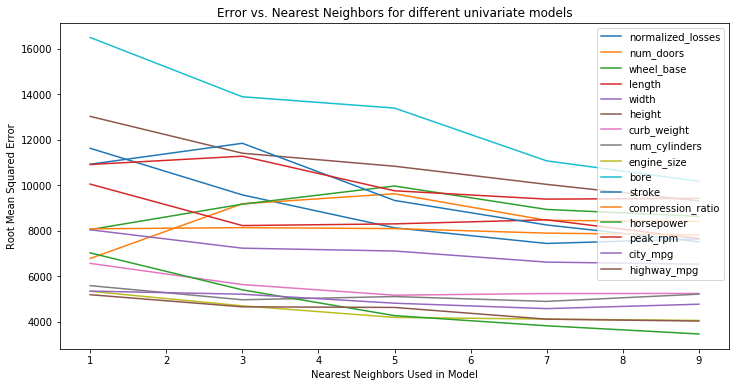

In [65]:
plt.figure(figsize=(12,6))
for key,sub_dict in rmses.items():
    x = list(sub_dict.keys())
    y = list(sub_dict.values())
    xy = list(sorted(zip(x,y)))
    x = [e[0] for e in xy]
    y = [e[1] for e in xy]
    plt.plot(x,y, label=key)
plt.legend()
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Nearest Neighbors Used in Model')
plt.title('Error vs. Nearest Neighbors for different univariate models')

The best performing features identified above perform well regardless of the number of nearest neighbors. The magical number of 5 seems to be an effective compromise, so let's fix it there for now.

## Multivariate models
Let's now use these results to combine the best features into multivariate models.

In [66]:
avg_rmses = {}
for key,sub_dict in rmses.items():
    avg_rmses[key] = np.mean(list(sub_dict.values()))

avg_rmses = sorted(avg_rmses.items(), key=lambda kv: kv[1])

avg_rmses

[('engine_size', 4479.7856097024915),
 ('highway_mpg', 4522.911623857427),
 ('horsepower', 4795.755143246612),
 ('city_mpg', 4943.696718142568),
 ('num_cylinders', 5153.114767359756),
 ('curb_weight', 5570.589863746504),
 ('width', 7108.476258297131),
 ('compression_ratio', 8007.936955858497),
 ('num_doors', 8492.619352282132),
 ('length', 8545.374123282701),
 ('normalized_losses', 8885.006587652755),
 ('wheel_base', 8953.712114458103),
 ('stroke', 9576.240416192688),
 ('peak_rpm', 10154.303500658927),
 ('height', 10927.52970357331),
 ('bore', 13009.824975293473)]

In [67]:
def knn_train_test_multi(training_cols, target_col, df):
    rand_df = df.reindex(np.random.permutation(df.index))
    threshold = int(.5 * len(df))
    training_data = df[:threshold]
    testing_data = df[threshold:]
    knn = KNeighborsRegressor()
    knn.fit(training_data[training_cols], training_data[target_col])
    prediction = knn.predict(testing_data[training_cols])
    return mean_squared_error(prediction, testing_data[target_col])**0.5

rmse_two_best = knn_train_test_multi(['engine_size', 'highway_mpg'], 'price', cars_normalized)
rmse_three_best = knn_train_test_multi(['engine_size', 'highway_mpg', 'horsepower'], 'price', cars_normalized)
rmse_four_best = knn_train_test_multi(['engine_size', 'highway_mpg', 'horsepower', 'city_mpg'], 'price', cars_normalized)
rmse_five_best = knn_train_test_multi(['engine_size', 'highway_mpg', 'horsepower', 'city_mpg', 'num_cylinders'], 'price', cars_normalized)

print(rmse_two_best, rmse_three_best, rmse_four_best,rmse_five_best)

4350.739368552121 3553.981440358945 3543.6021088353828 3320.621047006385


There is a clear benefit to using multiple features, with each larger multi variable model performing better than the smaller one before it.

## Hyperparameter optimization
Let's now try to squeeze as much performance as possible from our multivariate models by varying k over a large range

In [68]:
def knn_train_test_multi(training_cols, target_col, df, k):
    rand_df = df.reindex(np.random.permutation(df.index))
    threshold = int(.5 * len(df))
    training_data = df[:threshold]
    testing_data = df[threshold:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(training_data[training_cols], training_data[target_col])
    prediction = knn.predict(testing_data[training_cols])
    return mean_squared_error(prediction, testing_data[target_col])**0.5

best_models = {'two_best' : ['engine_size', 'highway_mpg'],
            'three_best' : ['engine_size', 'highway_mpg', 'horsepower'],
              'four_best' : ['engine_size', 'highway_mpg', 'horsepower', 'city_mpg'],
              'five_best' : ['engine_size', 'highway_mpg', 'horsepower', 'city_mpg', 'num_cylinders']}

rmses = {}
for models, cols in best_models.items():
    hyper_parameter_settings = {}
    for k in range(1,26):
        hyper_parameter_settings[k] = knn_train_test_multi(cols, 'price', cars_normalized, k)
    rmses[models] = hyper_parameter_settings

rmses

{'two_best': {1: 4354.642008225474,
  2: 4526.921679910048,
  3: 4498.433229142309,
  4: 4248.608371680761,
  5: 4350.739368552121,
  6: 4130.239857605504,
  7: 3654.7705512907833,
  8: 3406.299556274992,
  9: 3291.4253938953298,
  10: 3266.6972227539723,
  11: 3224.49796035129,
  12: 3066.8474225454743,
  13: 3107.0036162955766,
  14: 3188.063991712777,
  15: 3276.4526932206863,
  16: 3400.6384513355333,
  17: 3408.1445816852847,
  18: 3414.0628526759374,
  19: 3456.89519227418,
  20: 3492.0426405636645,
  21: 3534.9541209326044,
  22: 3558.967168879261,
  23: 3558.0960929779826,
  24: 3456.6927863991823,
  25: 3389.0481486057874},
 'three_best': {1: 3573.428345246881,
  2: 3918.785387510566,
  3: 4012.2889992124597,
  4: 3613.015900672851,
  5: 3553.981440358945,
  6: 3451.4337330349185,
  7: 3387.6562998182267,
  8: 3175.405256889689,
  9: 3077.2931249951084,
  10: 3205.004979499074,
  11: 3335.759981381083,
  12: 3501.7441190855247,
  13: 3644.6561170504287,
  14: 3627.423710815073

Text(0.5, 1.0, 'Error vs. Nearest Neighbors for different multivariate models')

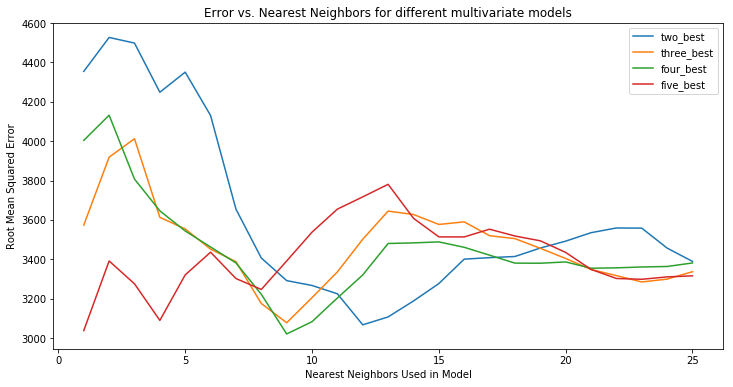

In [69]:
plt.figure(figsize=(12,6))
for key,sub_dict in rmses.items():
    x = list(sub_dict.keys())
    y = list(sub_dict.values())
    xy = list(sorted(zip(x,y)))
    x = [e[0] for e in xy]
    y = [e[1] for e in xy]
    plt.plot(x,y, label=key)
plt.legend()
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Nearest Neighbors Used in Model')
plt.title('Error vs. Nearest Neighbors for different multivariate models')

Although the model with five features performed best at k=5 nearest neighbors, the graph shows that further improvement can be obtained using the model with four variables and k=9.
## Conclusion
Different nearest neighbor models were tested to predict the price of cars. A model using four features and 9 nearest neighbors was found to be the most efficient using a root mean squared error metric.